<a href="https://www.kaggle.com/code/vaibhavpawar41/cancer-patient-data-sets-analysis?scriptVersionId=197792524" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Libraries

In [1]:
# Import necessary libraries

# Data manipulation and analysis
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning algorithms
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Model evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Comments explaining each section:

# 1. Data manipulation and visualization libraries:
#    - `pandas` is used for data manipulation, reading CSV files, and general data analysis.
#    - `matplotlib.pyplot` and `seaborn` are used for plotting data and visualizing distributions and relationships.

# 2. Machine learning algorithms and preprocessing:
#    - `LabelEncoder` is used to encode categorical target variables.
#    - `StandardScaler` is used to standardize features by removing the mean and scaling to unit variance.
#    - `RandomForestClassifier` is used for classification, which is a powerful ensemble learning algorithm.
#    - `train_test_split` is used to split the dataset into training and testing sets.

# 3. Performance evaluation:
#    - `classification_report` gives precision, recall, and F1-score for each class.
#    - `confusion_matrix` helps in understanding the model's predictions by comparing actual vs predicted labels.
#    - `accuracy_score` calculates the overall accuracy of the model.

# 4. Warnings are ignored using `warnings.filterwarnings("ignore")` to avoid unnecessary warning messages in the output.


# Collect Data

In [2]:
# Load the dataset
z= pd.read_csv('/kaggle/input/cancer-patient-data-sets/cancer patient data sets.csv')

In [3]:
# Data Overview
print(z.head())


   index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33       1              2            4             5   
1      1        P10   17       1              3            1             5   
2      2       P100   35       1              4            5             6   
3      3      P1000   37       1              7            7             7   
4      4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                     4             3                     2  ...        3   
1                     3             4                     2  ...        1   
2                     5             5                     4  ...        8   
3                     7             6                     7  ...        4   
4                     7             7                     6  ...        3   

   Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty

In [4]:
# Dataset Shape
print(z.shape)

(1000, 26)


In [5]:
# Dataset Information
print(z.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [6]:
# Statistical Overview
print(z.describe().T)


                           count     mean         std   min     25%    50%  \
index                     1000.0  499.500  288.819436   0.0  249.75  499.5   
Age                       1000.0   37.174   12.005493  14.0   27.75   36.0   
Gender                    1000.0    1.402    0.490547   1.0    1.00    1.0   
Air Pollution             1000.0    3.840    2.030400   1.0    2.00    3.0   
Alcohol use               1000.0    4.563    2.620477   1.0    2.00    5.0   
Dust Allergy              1000.0    5.165    1.980833   1.0    4.00    6.0   
OccuPational Hazards      1000.0    4.840    2.107805   1.0    3.00    5.0   
Genetic Risk              1000.0    4.580    2.126999   1.0    2.00    5.0   
chronic Lung Disease      1000.0    4.380    1.848518   1.0    3.00    4.0   
Balanced Diet             1000.0    4.491    2.135528   1.0    2.00    4.0   
Obesity                   1000.0    4.465    2.124921   1.0    3.00    4.0   
Smoking                   1000.0    3.948    2.495902   1.0    2

In [7]:
# Categorical Overview
print(z.describe(include="object").T)


           count unique   top freq
Patient Id  1000   1000    P1    1
Level       1000      3  High  365


In [8]:
# Checking for Missing Values
print(z.isnull().sum())


index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64


In [9]:
# Checking for Duplicate Rows
print(f'Total missing values: {z.isnull().sum().sum()}')
print(f'Total duplicates: {z.duplicated().sum()}')

Total missing values: 0
Total duplicates: 0


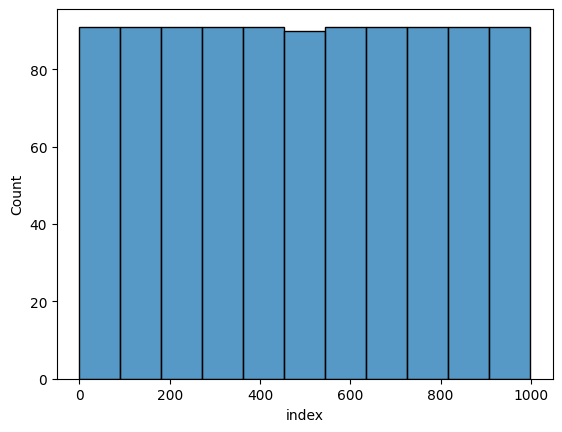

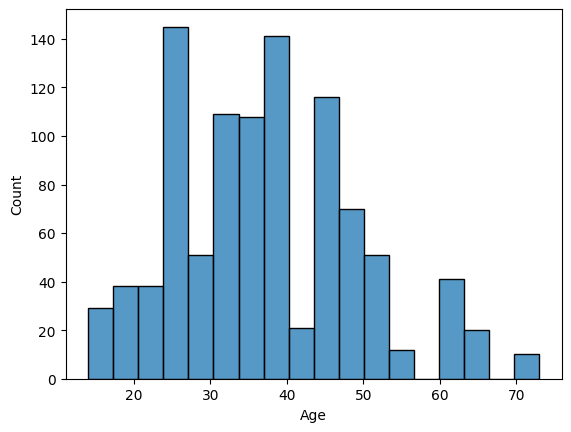

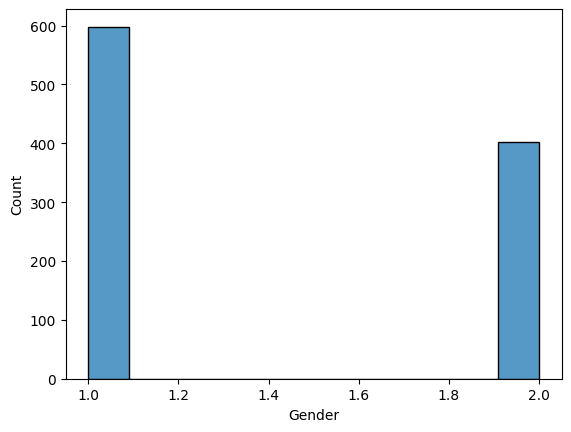

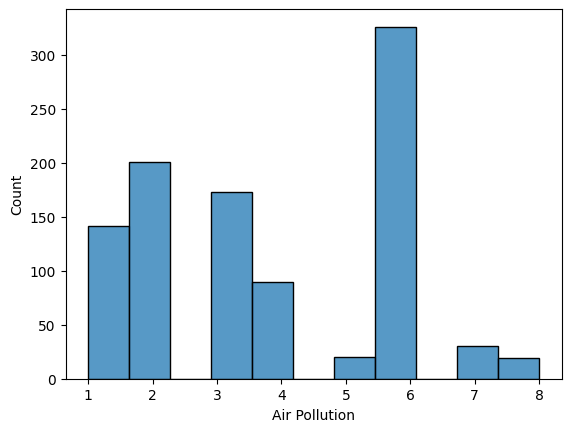

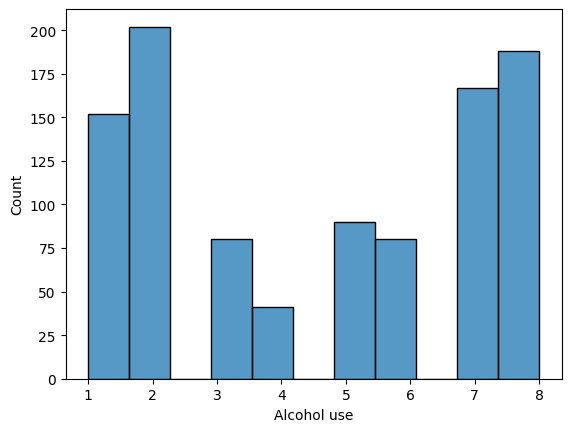

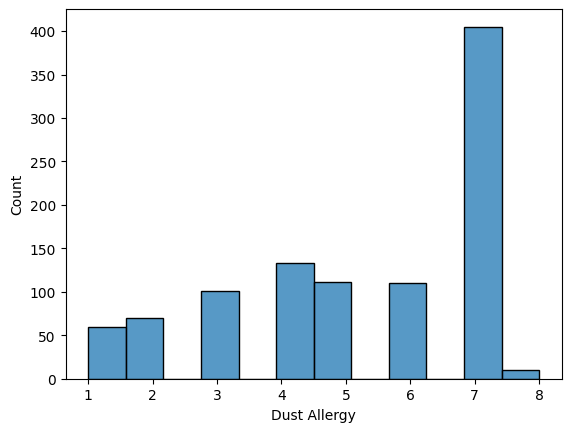

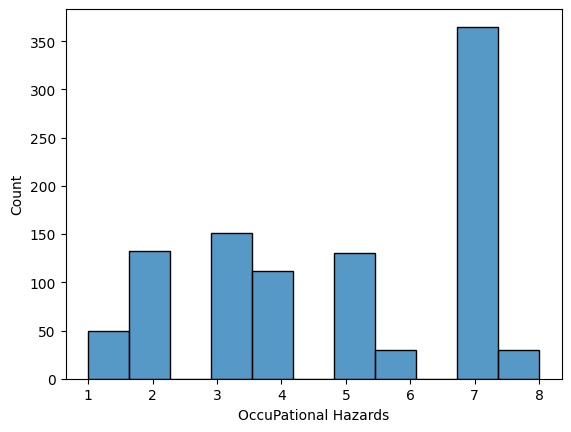

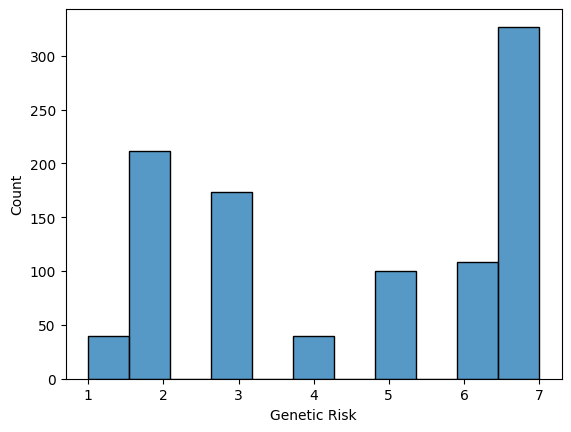

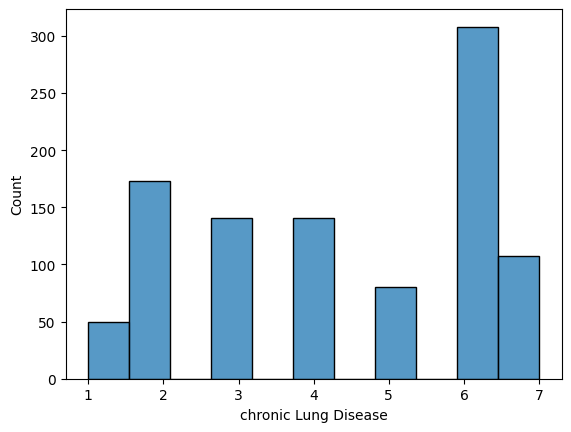

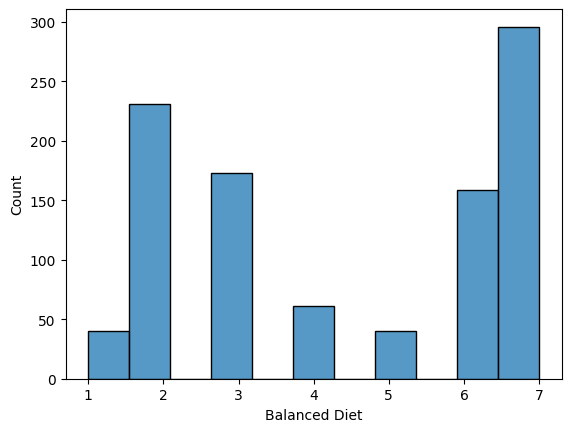

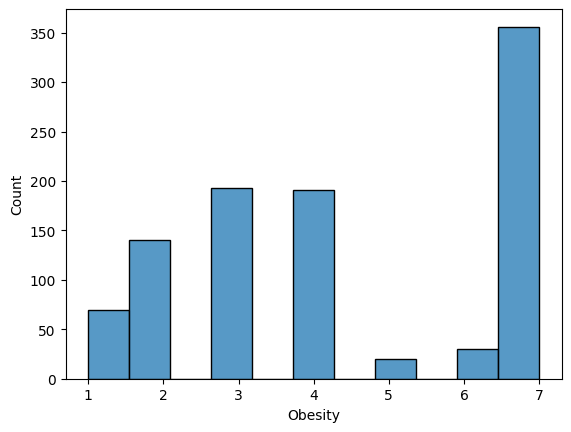

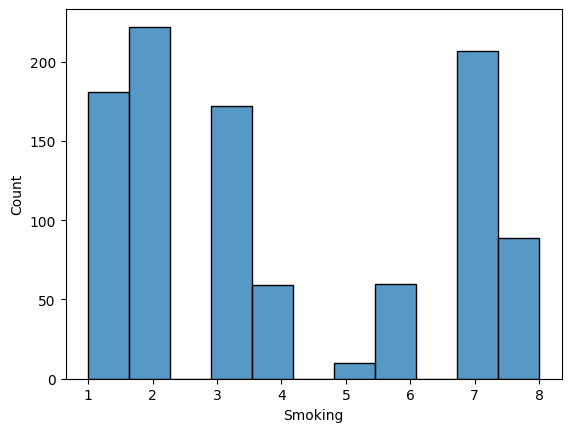

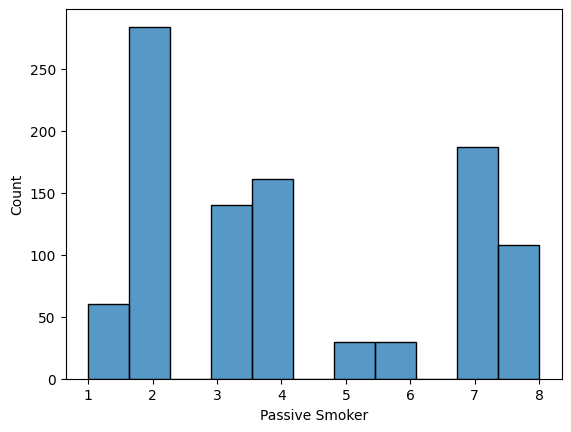

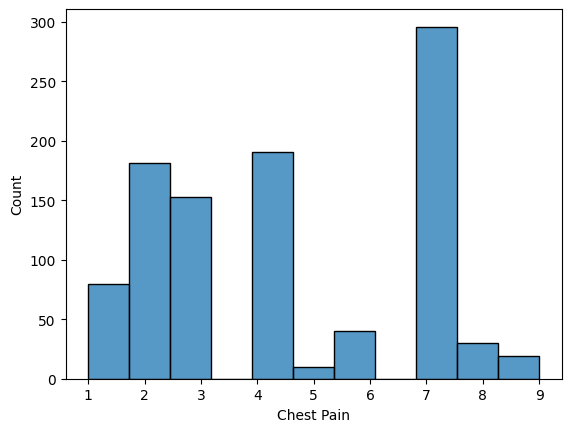

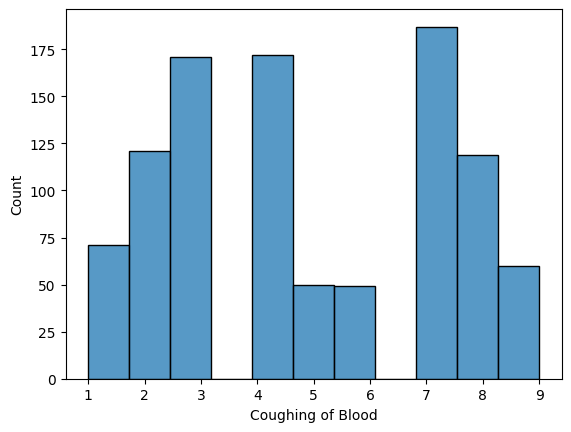

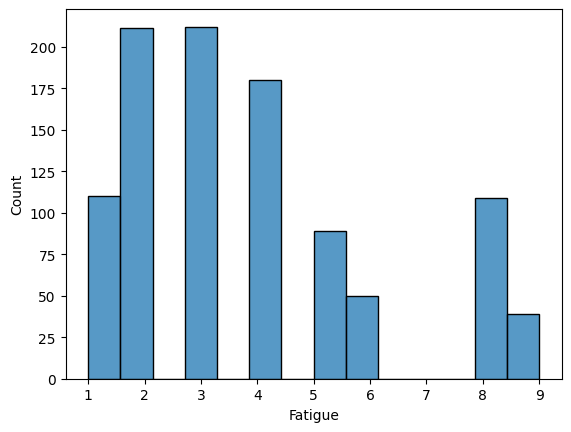

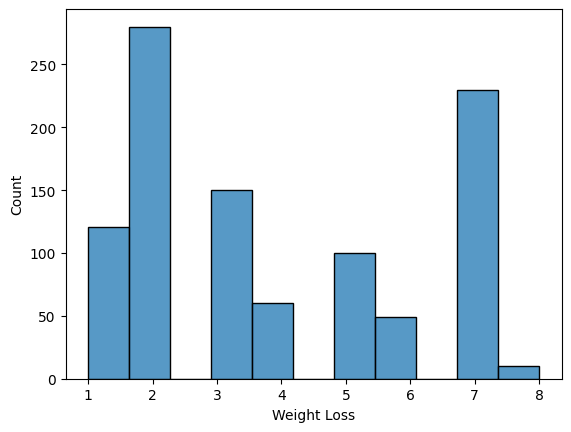

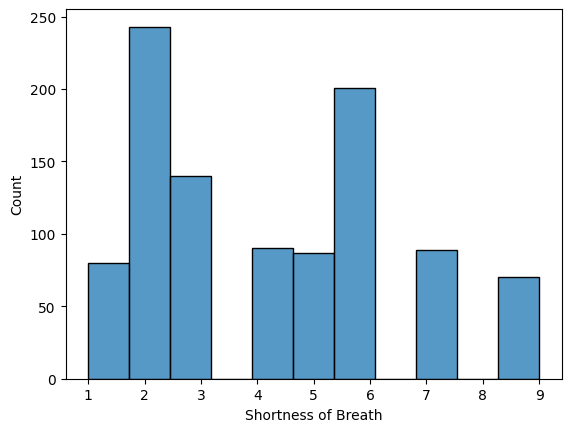

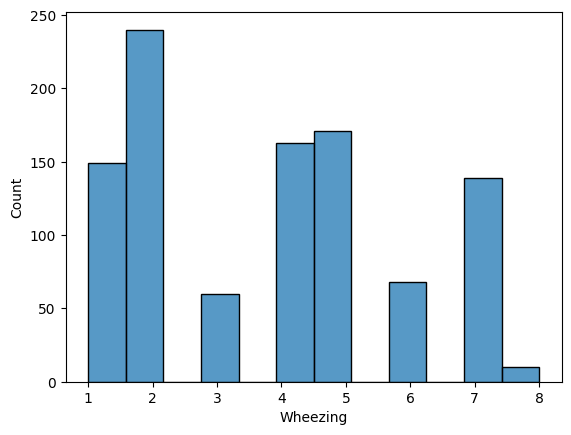

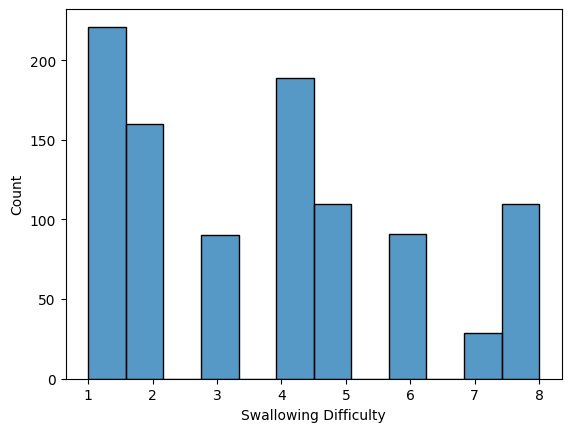

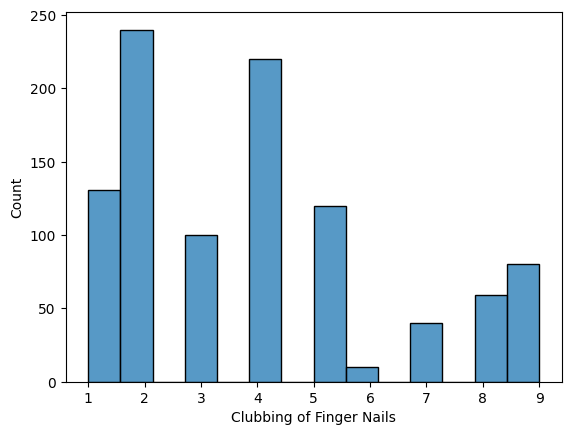

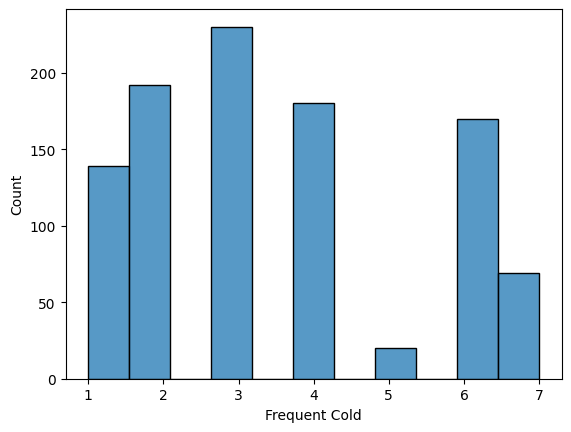

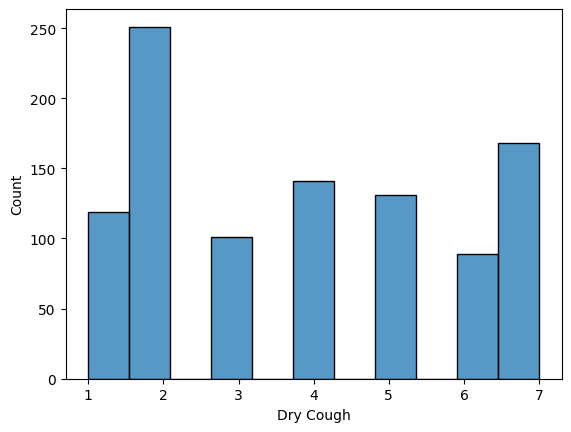

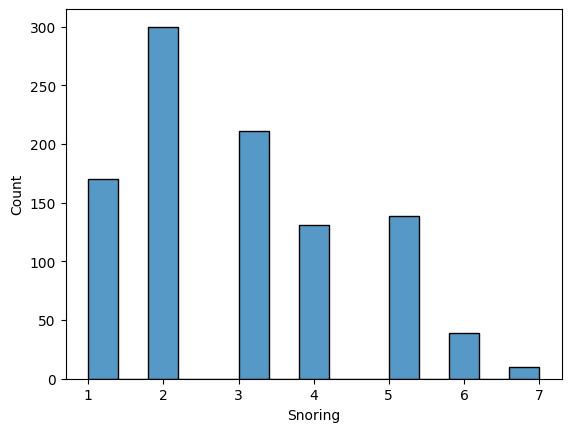

In [10]:
# Plotting Histograms for Numeric Columns
# Histogram to understand the distribution
for col in z.select_dtypes(include="number").columns:
    sns.histplot(data=z, x=col)
    plt.show()

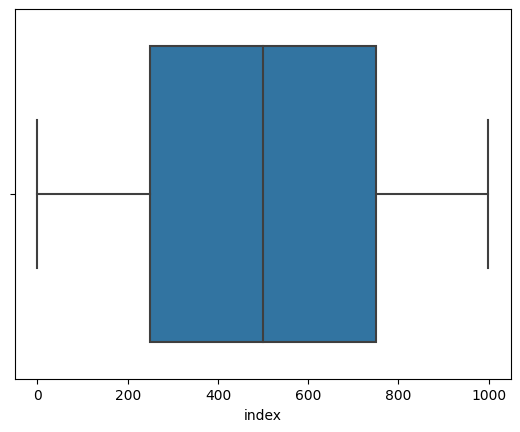

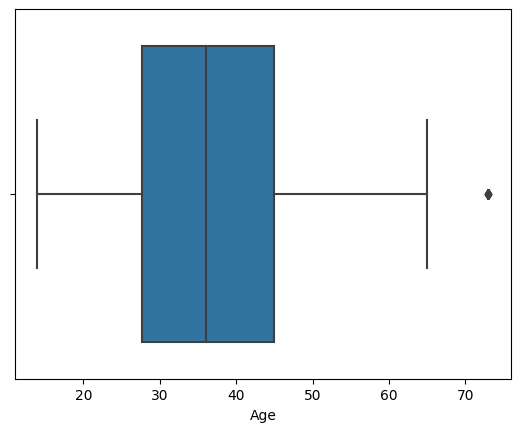

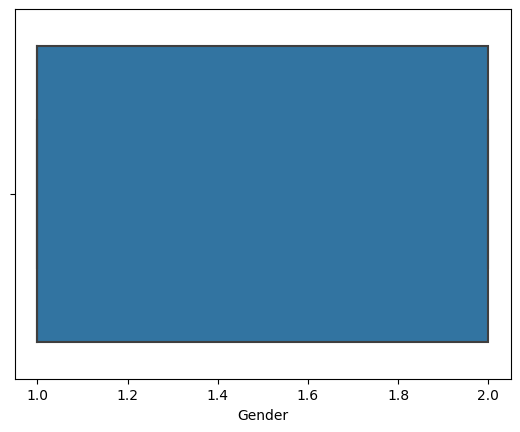

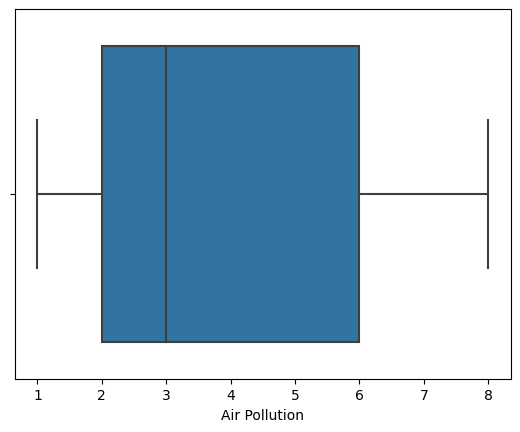

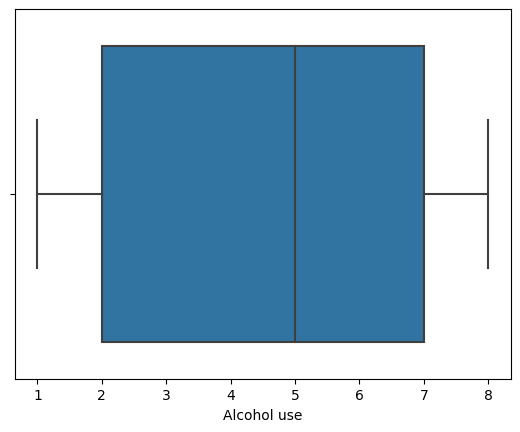

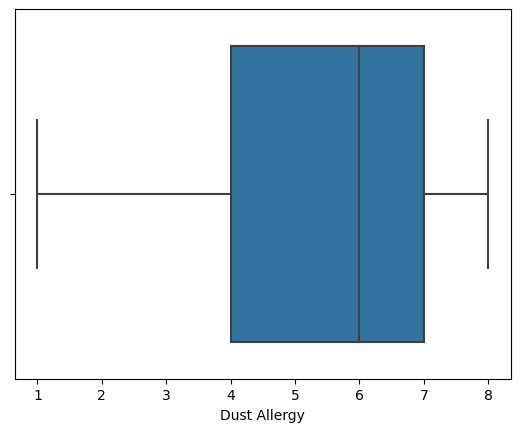

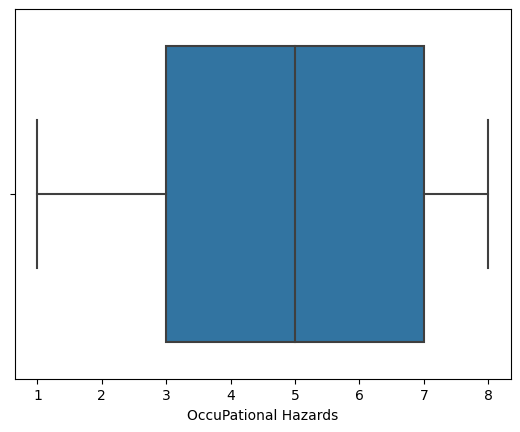

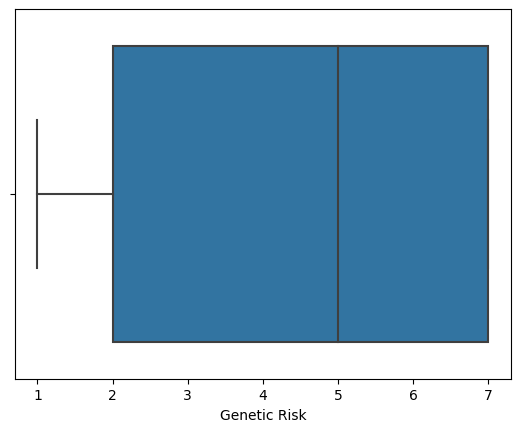

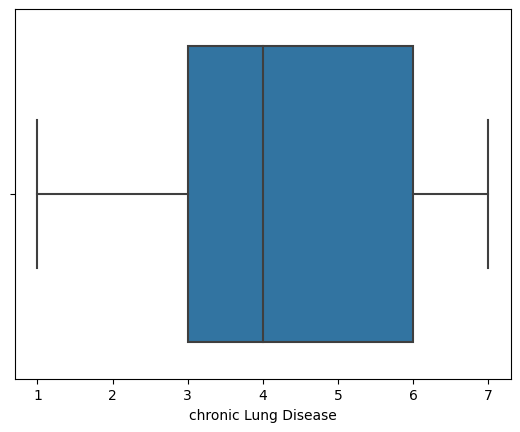

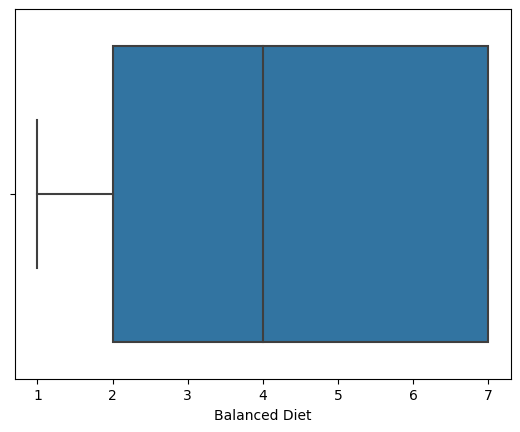

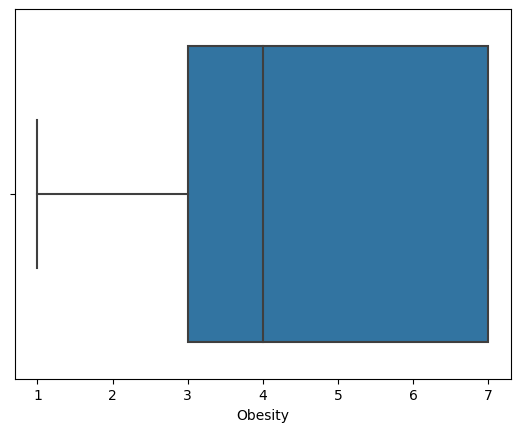

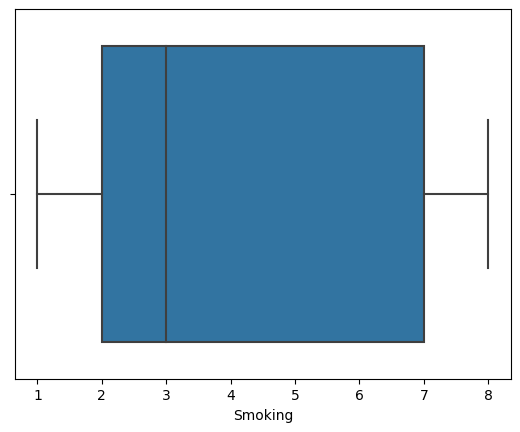

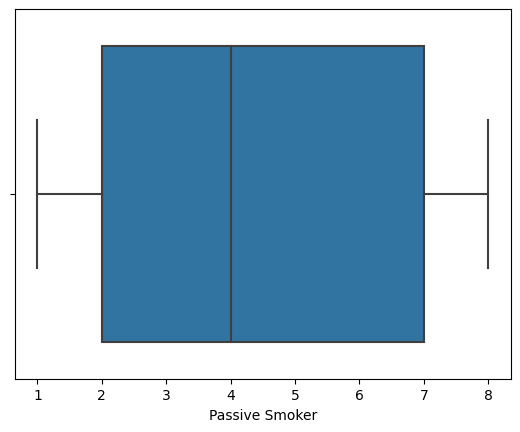

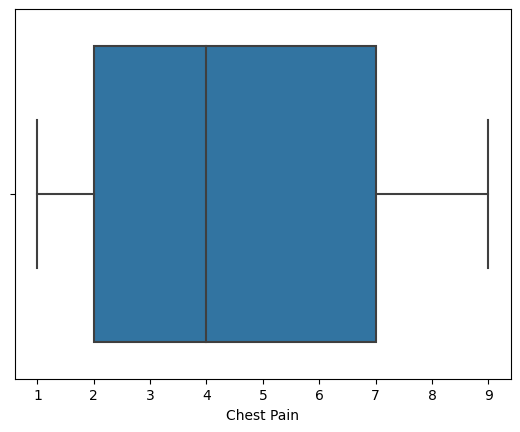

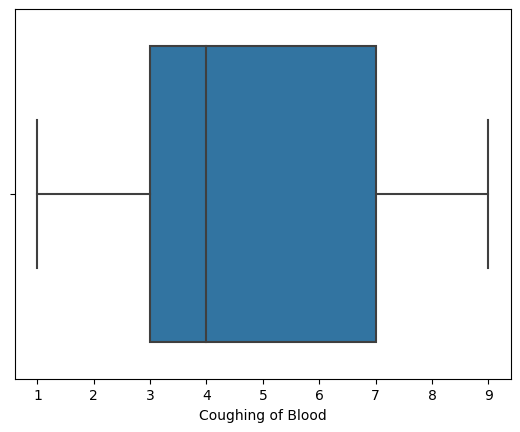

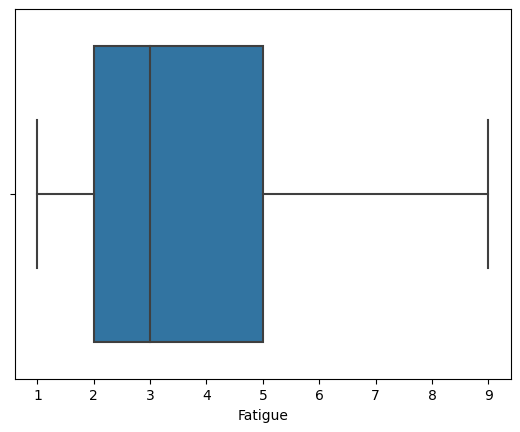

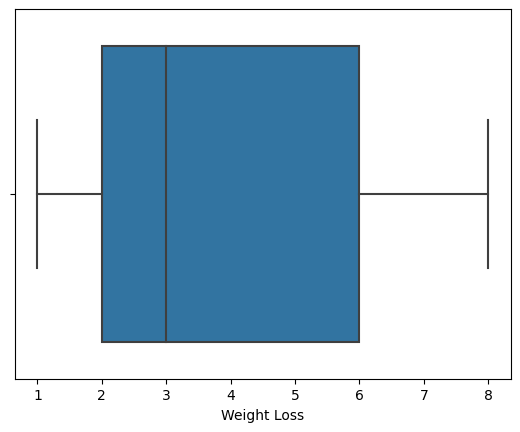

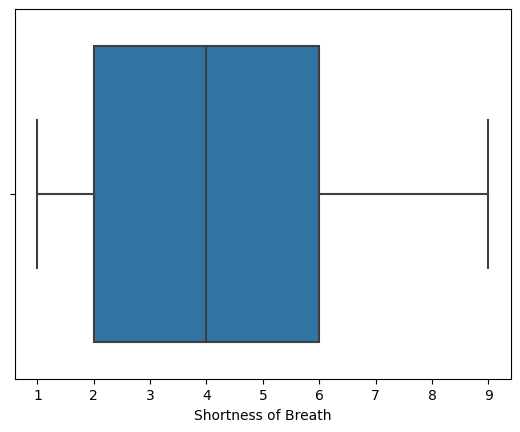

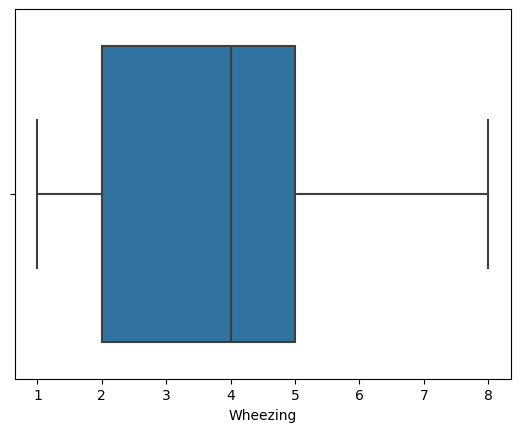

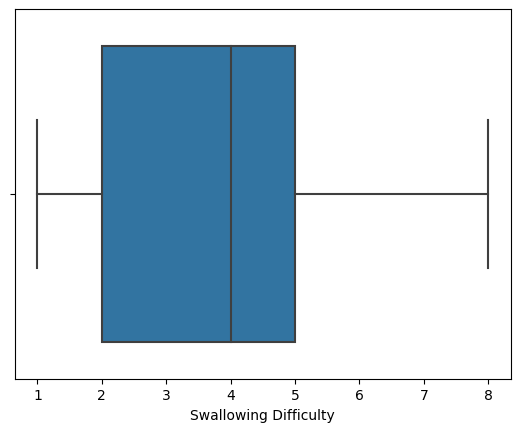

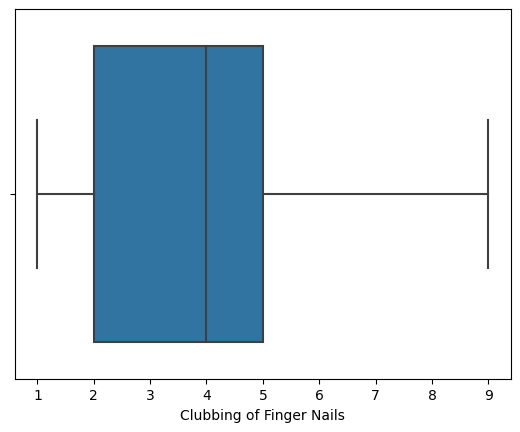

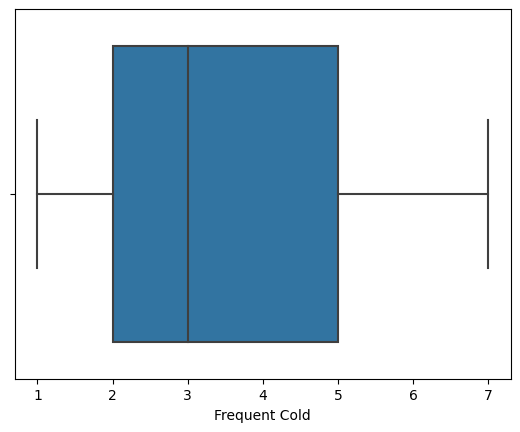

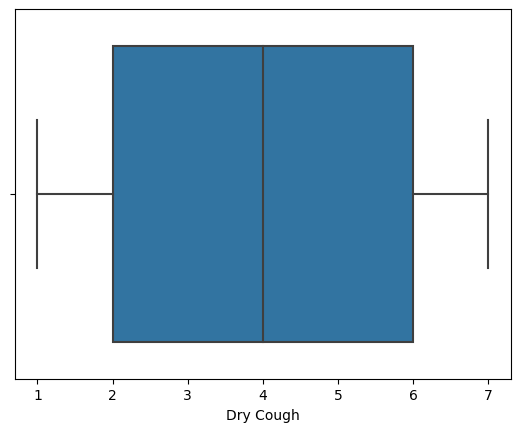

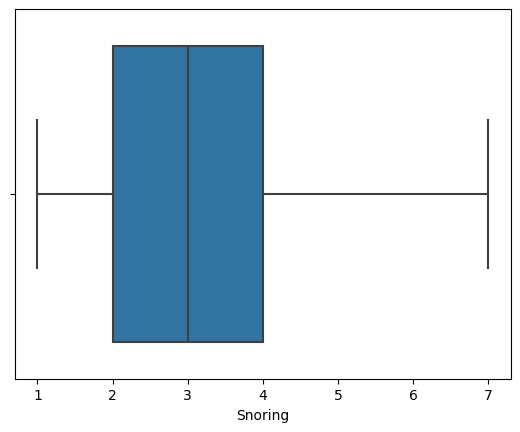

In [11]:
# Boxplot for Numeric Columns

for col in z.select_dtypes(include='number').columns:
    sns.boxplot(data=z, x=col)
    plt.show()

In [12]:
# Encode the target variable

label_encoder = LabelEncoder()
z['Level1'] = label_encoder.fit_transform(z['Level'])


In [13]:
# Display the encoded values
print(z[['Level', 'Level1']].sample(8))


      Level  Level1
503     Low       1
798    High       0
151     Low       1
606     Low       1
442    High       0
76   Medium       2
930     Low       1
306  Medium       2


In [14]:
print(z[['Level', 'Level1']].value_counts())

Level   Level1
High    0         365
Medium  2         332
Low     1         303
Name: count, dtype: int64


In [15]:

# Drop unnecessary columns
z.drop(['Level', 'Patient Id'], axis=1, inplace=True)


In [16]:
# Feature Scaling
feature = ['Age', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 
           'OccuPational Hazards', 'Genetic Risk', 
           'chronic Lung Disease', 'Balanced Diet', 
           'Fatigue', 'Weight Loss', 'Shortness of Breath', 
           'Wheezing', 'Swallowing Difficulty', 
           'Clubbing of Finger Nails', 'Frequent Cold', 
           'Dry Cough', 'Snoring']


In [17]:

# Standardize the features
scaler = StandardScaler()
z[feature] = scaler.fit_transform(z[feature])


In [18]:
# Split Data
x = z.drop('Level1', axis=1)  # Features
y = z['Level1']                # Target



In [19]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
# Print shapes
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)



(800, 24)
(200, 24)
(800,)
(200,)


In [21]:
# Model Training - Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)



RandomForestClassifier(random_state=42)

In [22]:
# Predictions
y_pred = model.predict(x_test)



In [23]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)



In [24]:
# Print results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(classification_rep)

Accuracy: 1.00
Confusion Matrix:
[[82  0  0]
 [ 0 55  0]
 [ 0  0 63]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



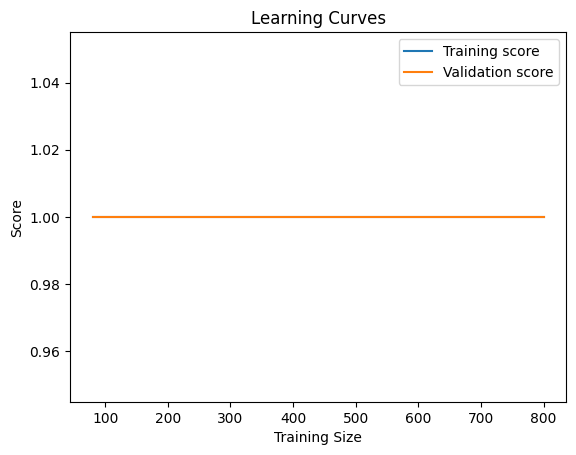

In [25]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, x, y, cv=5)
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Validation score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend()
plt.show()


# Logistic Regression

In [26]:
# Model Training - Logistic Regression
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression()

In [27]:
# Logistic Regression Evaluation
y_pred1 = model1.predict(x_test)
accuracy1 = accuracy_score(y_test,y_pred1)
confusion1 = confusion_matrix(y_test,y_pred1)
classification_repo1 = classification_report(y_test,y_pred1)

In [28]:
print("new accuracy is",accuracy1)
print("new confusion is",confusion1)
print("new classification report  is",classification_repo1)

new accuracy is 0.995
new confusion is [[82  0  0]
 [ 0 55  0]
 [ 1  0 62]]
new classification report  is               precision    recall  f1-score   support

           0       0.99      1.00      0.99        82
           1       1.00      1.00      1.00        55
           2       1.00      0.98      0.99        63

    accuracy                           0.99       200
   macro avg       1.00      0.99      1.00       200
weighted avg       1.00      0.99      0.99       200



# An accuracy of 0.3 (30%) indicates that your logistic regression model is not performing well

Result of all row off data set using model

In [29]:

for i in range(len(x)):
    Index = x['index'][i]
    f = x.iloc[i]
    f = f.to_numpy()
    f = f.reshape(1,-1)
    g = y[i]
    prediction = model.predict(f)
    
    print("index is  ",Index,"and prediction is  ", prediction, "actual result",g)

index is   0 and prediction is   [1] actual result 1
index is   1 and prediction is   [2] actual result 2
index is   2 and prediction is   [0] actual result 0
index is   3 and prediction is   [0] actual result 0
index is   4 and prediction is   [0] actual result 0
index is   5 and prediction is   [0] actual result 0
index is   6 and prediction is   [1] actual result 1
index is   7 and prediction is   [1] actual result 1
index is   8 and prediction is   [2] actual result 2
index is   9 and prediction is   [2] actual result 2
index is   10 and prediction is   [0] actual result 0
index is   11 and prediction is   [0] actual result 0
index is   12 and prediction is   [2] actual result 2
index is   13 and prediction is   [0] actual result 0
index is   14 and prediction is   [1] actual result 1
index is   15 and prediction is   [2] actual result 2
index is   16 and prediction is   [2] actual result 2
index is   17 and prediction is   [0] actual result 0
index is   18 and prediction is   [0] 

In [30]:
for i in range(1,10):
    g = y[i]
    print(g)

2
0
0
0
0
1
1
2
2
